<a href="https://colab.research.google.com/github/niyanta02/Projects/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [68]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [71]:
#generators 
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [72]:
#normalize

def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds= validation_ds.map(process)

In [87]:
#CNN

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [88]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.4221 - accuracy: 0.5913 - val_loss: 0.6092 - val_accuracy: 0.6796
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5707 - accuracy: 0.7060 - val_loss: 0.5358 - val_accuracy: 0.7360
Epoch 3/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4974 - accuracy: 0.7592 - val_loss: 0.5142 - val_accuracy: 0.7334
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4382 - accuracy: 0.7993 - val_loss: 0.7893 - val_accuracy: 0.5210
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3805 - accuracy: 0.8286 - val_loss: 0.4718 - val_accuracy: 0.7754
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3035 - accuracy: 0.8698 - val_loss: 0.4696 - val_accuracy: 0.7912
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2294 - accuracy: 0.9073 - val_loss: 0.6834 - val_ac

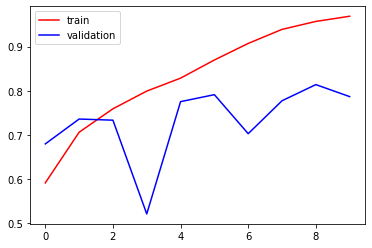

In [90]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


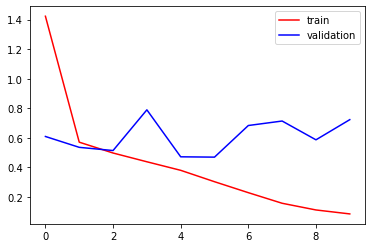

In [91]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [79]:
#overfiiting --> working well on training but not on testing
#batch normaization
#dropout

In [92]:
import cv2

In [117]:
test_img = cv2.imread('/content/cat.jpg')

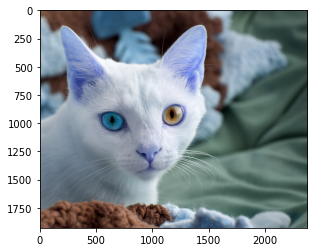

In [118]:
plt.imshow(test_img)

In [119]:
test_img.shape

(1927, 2370, 3)

In [120]:
test_img = cv2.resize(test_img,(256,256))

In [121]:
test_input=test_img.reshape((1,256,256,3))

In [122]:
model.predict(test_input)

1/1 [==============================] - 0s 40ms/step


array([[0.]], dtype=float32)